# Seattle Airbnb Data
https://www.kaggle.com/datasets/airbnb/seattle

## Which feature of listings affects the most their average ratings?

Bla bla bla

##### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

##### Import Datasets

In [2]:
df_listings = pd.read_csv('./seattle_airbnb_data/listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

#### Pre-Processing and Data Quality

##### Remove records with average rating missing

In [3]:
df_ratedListings = df_listings.dropna(subset = ['review_scores_rating'])

##### Check Missing Values in other Columns

In [7]:
nulls_in_cols = df_ratedListings.isnull().mean()

In [8]:
cols_with_nulls = nulls_in_cols[nulls_in_cols > 0]
cols_with_nulls

summary                        0.052665
space                          0.103437
neighborhood_overview          0.232734
notes                          0.373384
transit                        0.203091
thumbnail_url                  0.081047
medium_url                     0.081047
xl_picture_url                 0.081047
host_about                     0.181962
host_response_time             0.098392
host_response_rate             0.098392
host_acceptance_rate           0.150426
host_neighbourhood             0.064018
neighbourhood                  0.096184
zipcode                        0.001892
bathrooms                      0.003784
bedrooms                       0.001892
square_feet                    0.971302
weekly_price                   0.434879
monthly_price                  0.572375
security_deposit               0.492274
cleaning_fee                   0.239357
review_scores_accuracy         0.003469
review_scores_cleanliness      0.001892
review_scores_checkin          0.003469


In [9]:
almost_null_columns = cols_with_nulls[cols_with_nulls > .75].to_frame().index.values
almost_null_columns

array(['square_feet', 'license'], dtype=object)

##### Checking Columns with Unique Values

In [10]:
unique_val_in_cols = df_ratedListings.nunique()
unique_val_in_cols

id                                  3171
listing_url                         3171
scrape_id                              1
last_scraped                           1
name                                3153
summary                             2868
space                               2740
description                         3108
experiences_offered                    1
neighborhood_overview               2196
notes                               1813
transit                             2271
thumbnail_url                       2914
medium_url                          2914
picture_url                         3171
xl_picture_url                      2914
host_id                             2288
host_url                            2288
host_name                           1283
host_since                          1264
host_location                        100
host_about                          1784
host_response_time                     4
host_response_rate                    43
host_acceptance_

In [11]:
cols_with_unique_val = unique_val_in_cols[unique_val_in_cols == 1]
cols_with_unique_val

scrape_id                1
last_scraped             1
experiences_offered      1
state                    1
market                   1
country_code             1
country                  1
has_availability         1
calendar_last_scraped    1
requires_license         1
jurisdiction_names       1
dtype: int64

##### Define Subset Dataframe with Columns of Interest

Exclude id, url, unique, mostly null, verbose description, redundant info

Redundant example (neigh and latitude)

In [139]:
df_importance_rating = df_ratedListings[['host_since', 'host_response_time',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'host_listings_count', 
        'host_has_profile_pic', 'host_identity_verified',
        # 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
        #'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type', #'amenities', 
        'price', 'security_deposit',
        'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
        'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews',
        'first_review', 'last_review', 'review_scores_rating', 
        'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture',
        'require_guest_phone_verification', 'reviews_per_month']]

##### Cast Columns to Numeric when Possible

Money Columns

In [140]:
money_columns = []
for col in df_importance_rating.columns:
    try:
        check_money = df_importance_rating[col].str.contains('\$').any()
        if check_money:
            money_columns.append(col)
    except:
        1
money_columns

['price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [141]:
for col in money_columns:
    df_importance_rating[col] = df_importance_rating[col].replace(regex=[r'\$', r','], value='').astype('float64')

C:\Users\2100\AppData\Local\Temp\ipykernel_26496\3849643416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importance_rating[col] = df_importance_rating[col].replace(regex=[r'\$', r','], value='').astype('float64')


Date Columns

In [142]:
date_columns = ['host_since', 'first_review', 'last_review']

In [143]:
for col in date_columns:
    df_importance_rating[col] = - ((pd.to_datetime(df_importance_rating[col]) - pd.to_datetime("today")).dt.days)

C:\Users\2100\AppData\Local\Temp\ipykernel_26496\395206095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importance_rating[col] = - ((pd.to_datetime(df_importance_rating[col]) - pd.to_datetime("today")).dt.days)
C:\Users\2100\AppData\Local\Temp\ipykernel_26496\395206095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importance_rating[col] = - ((pd.to_datetime(df_importance_rating[col]) - pd.to_datetime("today")).dt.days)
C:\Users\2100\AppData\Local\Temp\ipykernel_26496\395206095.py:2: Setti

In [144]:
df_importance_rating[date_columns]

,host_since,first_review,last_review
0,4237,4155,2632
1,3677,3498,2636
2,3201,3153,2753
4,4127,3903,2702
5,4466,2837,2728
...,...,...,...
3810,4149,2725,2638
3811,3332,2725,2710
3812,3850,3175,2636
3813,2896,2729,2729


% Columns

In [145]:
percent_columns = []
for col in df_importance_rating.columns:
    try:
        check_percent = df_importance_rating[col].str.contains('\%').any()
        if check_percent:
            percent_columns.append(col)
    except:
        1
percent_columns

['host_response_rate', 'host_acceptance_rate']

In [146]:
for col in percent_columns:
    df_importance_rating[col] = df_importance_rating[col].replace(regex=[r'\%', r','], value='').astype('float64')

C:\Users\2100\AppData\Local\Temp\ipykernel_26496\2285418849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importance_rating[col] = df_importance_rating[col].replace(regex=[r'\%', r','], value='').astype('float64')


Boolean Columns

In [147]:
boolean_columns = []
for col in df_importance_rating.columns:
    try:
        check_boolean = df_importance_rating[col].eq('t').any()
        if check_boolean:
            boolean_columns.append(col)
    except:
        1
boolean_columns

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [148]:
Dummy_Boolean_Columns = pd.get_dummies(df_importance_rating[boolean_columns], prefix=boolean_columns, drop_first=True)
Dummy_Boolean_Columns

,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,is_location_exact_t,instant_bookable_t,require_guest_profile_picture_t,require_guest_phone_verification_t
0,0,1,1,1,0,0,0
1,1,1,1,1,0,1,1
2,0,1,1,1,0,0,0
4,0,1,1,1,0,0,0
5,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
3810,0,1,1,1,0,0,0
3811,0,1,1,1,0,0,0
3812,1,1,1,1,1,1,1
3813,0,1,1,1,0,0,0


In [149]:
df_importance_rating = pd.concat([df_importance_rating.drop(boolean_columns, axis = 1), Dummy_Boolean_Columns], axis = 1)

Calendar_updated

In [150]:
df_importance_rating.calendar_updated.unique()

array(['4 weeks ago', 'today', '5 weeks ago', '7 weeks ago',
       '2 weeks ago', 'yesterday', '5 months ago', 'a week ago',
       '5 days ago', '3 days ago', '2 months ago', '3 months ago',
       '4 days ago', '2 days ago', '3 weeks ago', '1 week ago',
       '6 weeks ago', '4 months ago', '6 days ago', '6 months ago',
       '10 months ago', '14 months ago', '8 months ago', '7 months ago',
       '30 months ago', 'never', '9 months ago', '11 months ago',
       '22 months ago', '12 months ago', '13 months ago'], dtype=object)

In [151]:
calendar_updated_numeric = []
unique_string_values = df_importance_rating.calendar_updated.unique()
unique_int_values = [28, 1, 35, 49, 14, 2, 150, 7, 5, 3, 60, 90, 4, 2, 21, 7, 42, 120, 6, 180, 300, 420, 240, 210, 900, 1000, 270, 330, 660, 365, 390]
for i in df_importance_rating.index:
    for j in range(len(unique_string_values)):
        if df_importance_rating['calendar_updated'][i] == unique_string_values[j]:
            calendar_updated_numeric.append(unique_int_values[j])

In [152]:
df_importance_rating['calendar_updated_numeric'] = calendar_updated_numeric

In [153]:
df_importance_rating = df_importance_rating.drop('calendar_updated', axis = 1)

##### Categorical Columns

In [154]:
Categorical_Columns = df_importance_rating.select_dtypes(include=['object'])
Categorical_Columns.columns

Index(['host_response_time', 'property_type', 'room_type', 'bed_type',
       'cancellation_policy'],
      dtype='object')

In [155]:
Dummy_Encoded_Columns = pd.get_dummies(Categorical_Columns, prefix=Categorical_Columns.columns)

In [156]:
Dummy_Encoded_Columns

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3811,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3812,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3813,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [157]:
df_importance_rating = pd.concat([df_importance_rating.drop(columns = Categorical_Columns.columns), Dummy_Encoded_Columns], axis = 1)

##### Remove Binary Columns with Almost Same Value for all records

In [158]:
isfalse = df_importance_rating.eq(0).mean()
istrue = df_importance_rating.eq(1).mean()

In [159]:
almostFalse = isfalse[isfalse > 0.9].to_frame().index.values
almostFalse

array(['require_guest_profile_picture_t',
       'host_response_time_a few days or more',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Loft', 'property_type_Other', 'property_type_Tent',
       'property_type_Townhouse', 'property_type_Treehouse',
       'property_type_Yurt', 'room_type_Shared room', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa'],
      dtype=object)

In [160]:
almostTrue = istrue[istrue > 0.9].to_frame().index.values
almostTrue

array(['host_has_profile_pic_t', 'is_location_exact_t',
       'bed_type_Real Bed'], dtype=object)

In [161]:
df_importance_rating = df_importance_rating.drop(almostFalse, axis=1).drop(almostTrue, axis=1)

##### Impute Null Values

In [162]:
nulls_in_cols = df_importance_rating.isnull().mean()

In [163]:
cols_with_nulls = nulls_in_cols[nulls_in_cols > 0]
cols_with_nulls

host_response_rate      0.098392
host_acceptance_rate    0.150426
bathrooms               0.003784
bedrooms                0.001892
security_deposit        0.492274
cleaning_fee            0.239357
dtype: float64

In [164]:
cols_with_nulls.index

Index(['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms',
       'security_deposit', 'cleaning_fee'],
      dtype='object')

In [165]:
df_importance_rating[cols_with_nulls.index] = df_importance_rating[cols_with_nulls.index].fillna(0)

#### Linear Regression

##### Remove Collinear Columns

In [166]:
correlation_matrix = df_importance_rating.corr()

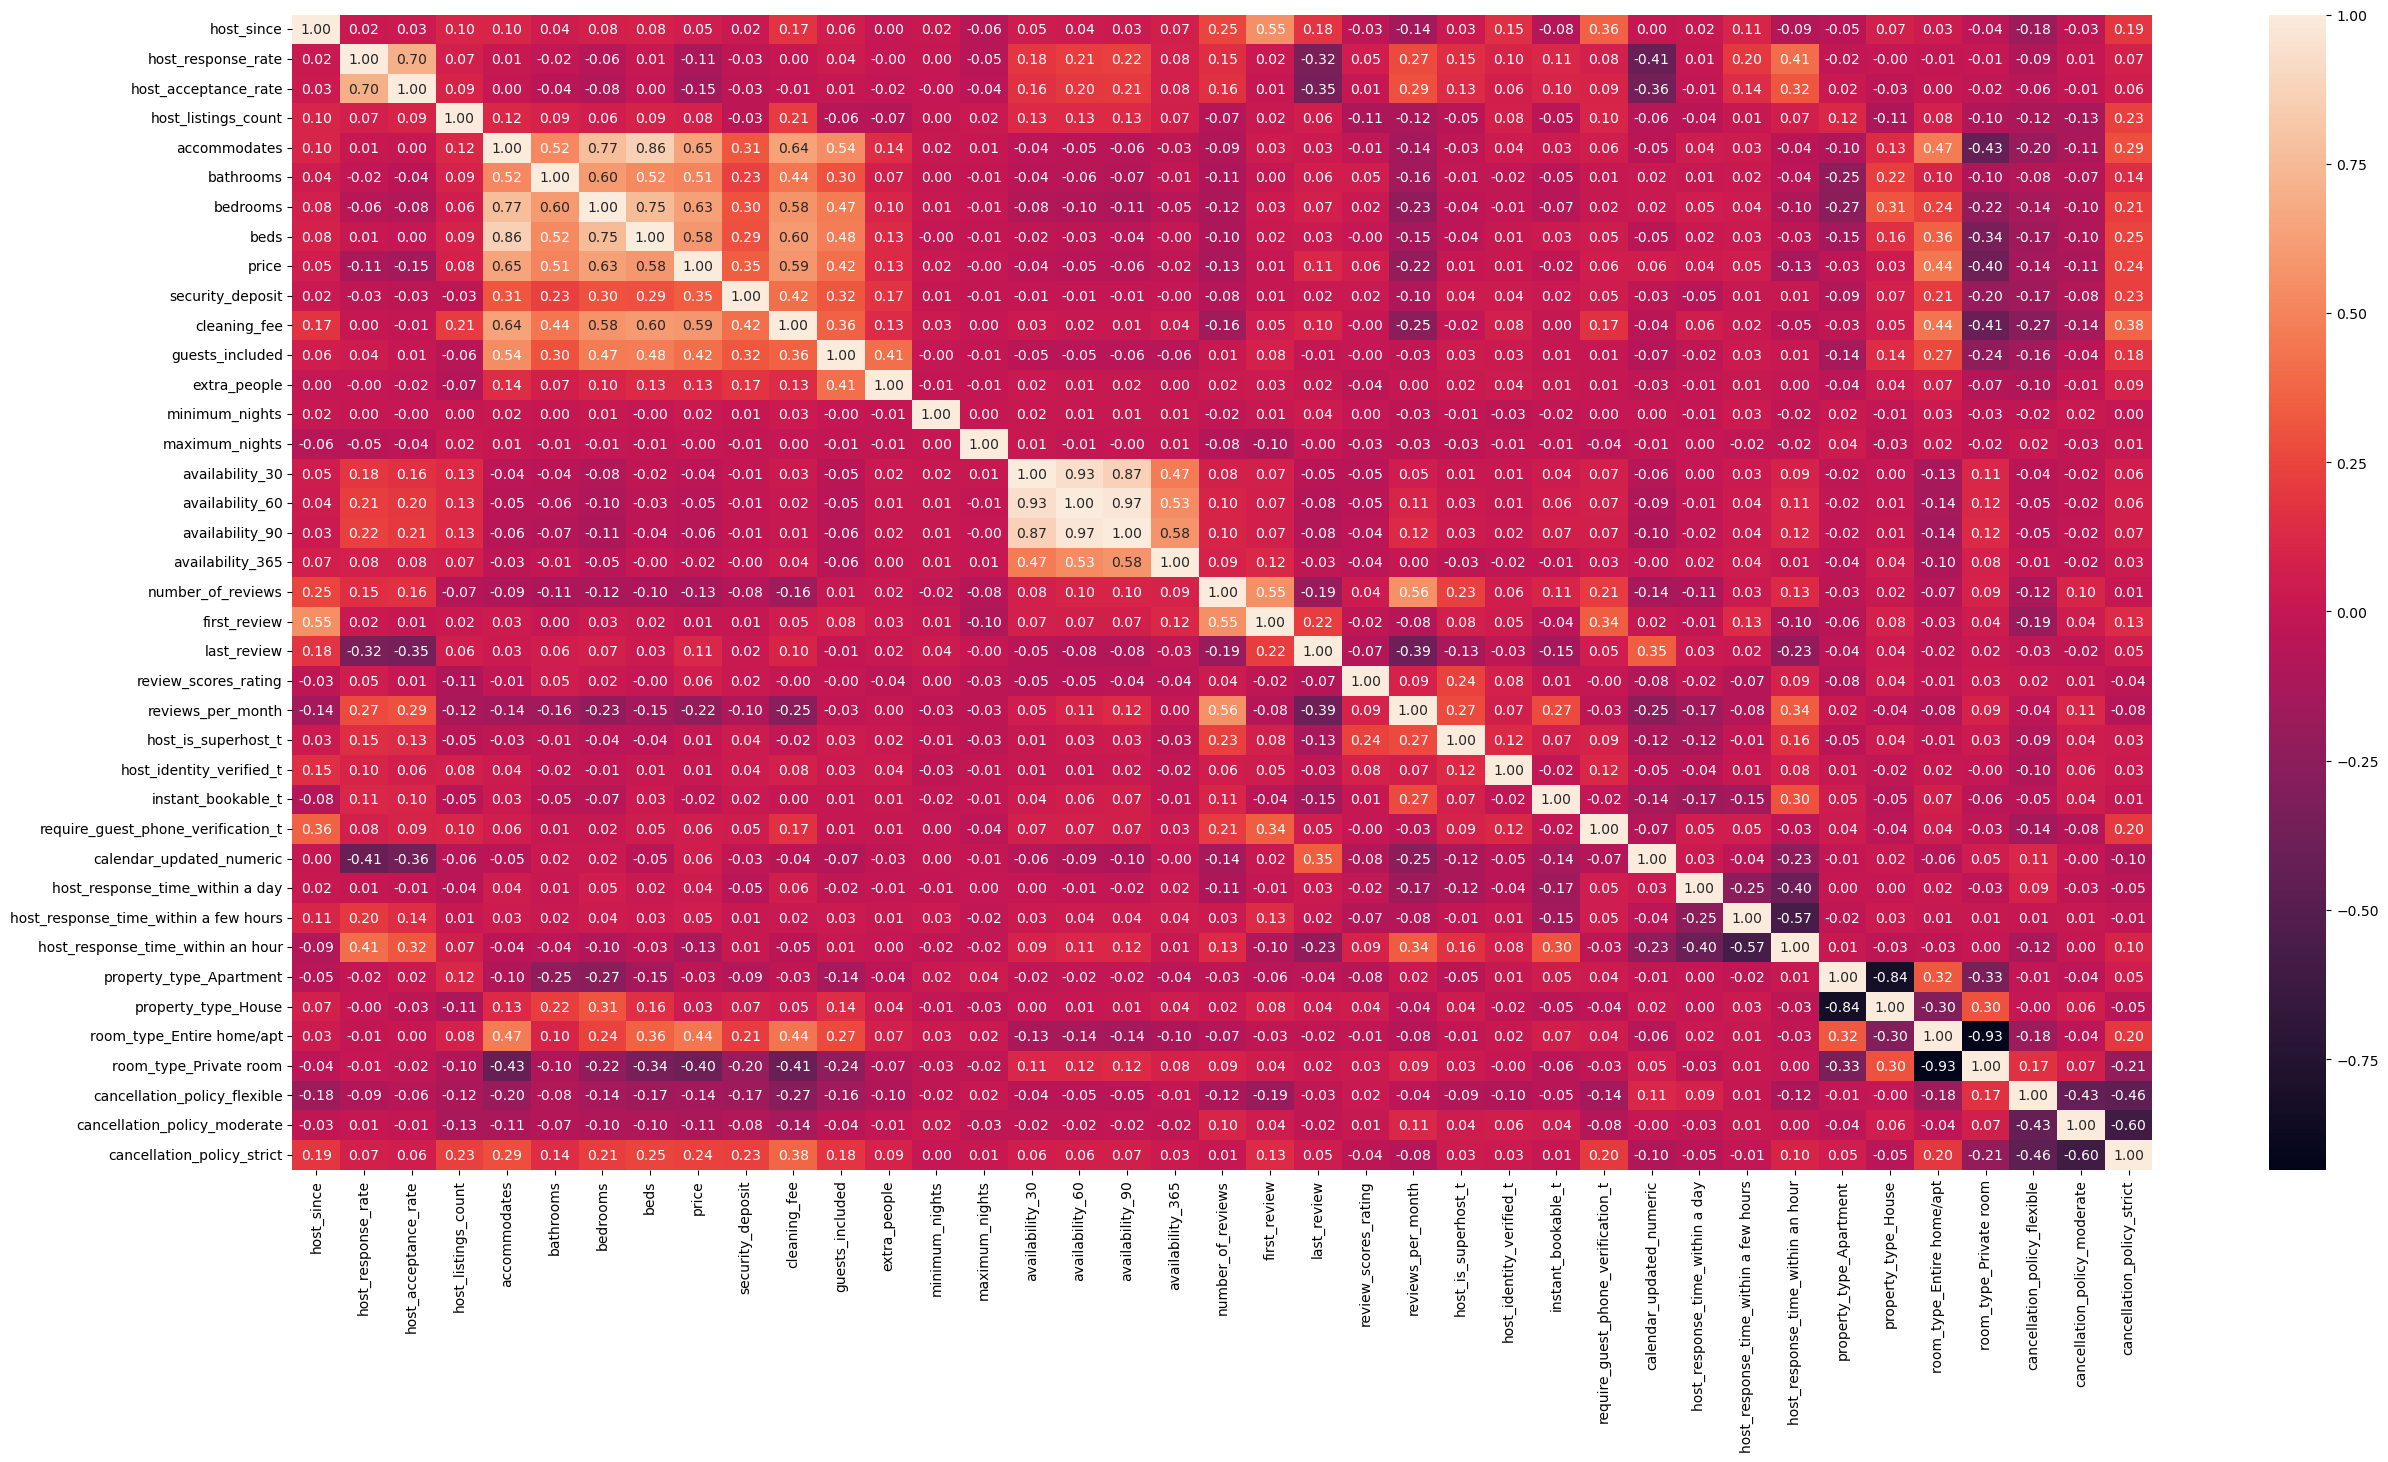

In [167]:
plt.figure(figsize = (30,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f");

In [168]:
collinear_columns = {}
for f in correlation_matrix.columns:
    collinear_columns[f] = [i for i in correlation_matrix.index if np.abs(correlation_matrix.at[f,i])>.5 and f>i]

In [169]:
collinear_columns

{'host_since': ['first_review'],
 'host_response_rate': ['host_acceptance_rate'],
 'host_acceptance_rate': [],
 'host_listings_count': [],
 'accommodates': [],
 'bathrooms': ['accommodates'],
 'bedrooms': ['accommodates', 'bathrooms'],
 'beds': ['accommodates', 'bathrooms', 'bedrooms'],
 'price': ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee'],
 'security_deposit': [],
 'cleaning_fee': ['accommodates', 'bedrooms', 'beds'],
 'guests_included': ['accommodates'],
 'extra_people': [],
 'minimum_nights': [],
 'maximum_nights': [],
 'availability_30': [],
 'availability_60': ['availability_30', 'availability_365'],
 'availability_90': ['availability_30', 'availability_60', 'availability_365'],
 'availability_365': [],
 'number_of_reviews': ['first_review'],
 'first_review': [],
 'last_review': [],
 'review_scores_rating': [],
 'reviews_per_month': ['number_of_reviews'],
 'host_is_superhost_t': [],
 'host_identity_verified_t': [],
 'instant_bookable_t': [],
 'require_guest_p

In [170]:
collinear_columns_list = []
for key in collinear_columns:
    collinear_columns_list.extend(collinear_columns[key])
collinear_columns_list

['first_review',
 'host_acceptance_rate',
 'accommodates',
 'accommodates',
 'bathrooms',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'accommodates',
 'bedrooms',
 'beds',
 'accommodates',
 'availability_30',
 'availability_365',
 'availability_30',
 'availability_60',
 'availability_365',
 'first_review',
 'number_of_reviews',
 'host_response_time_within a few hours',
 'property_type_Apartment',
 'room_type_Entire home/apt',
 'cancellation_policy_moderate']

In [171]:
df_regression = df_importance_rating.drop(collinear_columns_list, axis = 1)

##### Instance and Fit the Model

In [172]:
X = df_regression.drop(columns = 'review_scores_rating')
y = df_regression['review_scores_rating']

No need to separate in train and test because only interested in main features

In [173]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

##### Study Linear Coefficients

In [174]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df

,est_int,coefs,abs_coefs
12,host_is_superhost_t,3.356079,3.356079
18,host_response_time_within an hour,1.224378,1.224378
13,host_identity_verified_t,1.180649,1.180649
14,instant_bookable_t,-0.644253,0.644253
17,host_response_time_within a day,0.607835,0.607835
21,cancellation_policy_flexible,0.552823,0.552823
20,room_type_Private room,0.508966,0.508966
19,property_type_House,0.264089,0.264089
22,cancellation_policy_strict,-0.224801,0.224801
5,guests_included,-0.213527,0.213527


## Are ratings related to prices, fees or deposits?

In [175]:
coefs_df_money = coefs_df[coefs_df.est_int.isin(money_columns)]

In [176]:
coefs_df_money['importance'] = coefs_df_money['abs_coefs']/max(coefs_df['abs_coefs'])

C:\Users\2100\AppData\Local\Temp\ipykernel_26496\2250599299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefs_df_money['importance'] = coefs_df_money['abs_coefs']/max(coefs_df['abs_coefs'])


In [177]:
coefs_df_money

,est_int,coefs,abs_coefs,importance
6,extra_people,-0.015147,0.015147,0.004513
3,price,0.008745,0.008745,0.002606
4,security_deposit,0.000098,0.000098,0.000029


## Are ratings realated to hosts' features and hosting policies?

In [178]:
host_columns = df_regression.columns[df_regression.columns.str.contains('host')]
host_columns

Index(['host_since', 'host_response_rate', 'host_listings_count',
       'host_is_superhost_t', 'host_identity_verified_t',
       'host_response_time_within a day', 'host_response_time_within an hour'],
      dtype='object')

In [179]:
coefs_df_host = coefs_df[coefs_df.est_int.isin(host_columns)]

In [180]:
coefs_df_host['importance'] = coefs_df_host['abs_coefs']/max(coefs_df['abs_coefs'])

C:\Users\2100\AppData\Local\Temp\ipykernel_26496\1025499234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefs_df_host['importance'] = coefs_df_host['abs_coefs']/max(coefs_df['abs_coefs'])


In [181]:
coefs_df_host

,est_int,coefs,abs_coefs,importance
12,host_is_superhost_t,3.356079,3.356079,1.000000
18,host_response_time_within an hour,1.224378,1.224378,0.364824
13,host_identity_verified_t,1.180649,1.180649,0.351794
17,host_response_time_within a day,0.607835,0.607835,0.181115
2,host_listings_count,-0.027274,0.027274,0.008127
1,host_response_rate,-0.004904,0.004904,0.001461
0,host_since,-0.000291,0.000291,0.000087
